# Chapter 4. NumPy Basics: Arrays and Vectorized Computation

NumPy stands for "Numerical Python" and it provides a solid foundation for numeric computation in Python.
Here are some of the main features covered in this book:

- fast vectorized array operations
- common array algorithms such as sorting and set operations
- efficient descriptive statistics
- expressing conditional logic using arrays (instead of looping)
- group-wise data manipulation

NumPy is designed for efficiency on large arrays of data; the author continues to describe some of the ways it is able to accomplish this.
Here is a simple demonstration of thie preformance NumPy.

In [2]:
import numpy as np

np.random.seed(0)

my_array = np.arange(1000000)
my_list = list(range(1000000))

In [3]:
%time for _ in range(10): my_array = my_array * 2

CPU times: user 18.5 ms, sys: 12.9 ms, total: 31.4 ms
Wall time: 32.7 ms


In [4]:
%time for _ in range(10): my_list = [x * 2 for x in my_list]

CPU times: user 1.35 s, sys: 529 ms, total: 1.88 s
Wall time: 2.95 s


## 4.1 The NumPy ndarray: a multidimensional array object

`ndarray` stands for N-dimensional array.
It is a fast flexible data structure with which we can conduct vectorized computations.
Here is a simple example.

In [5]:
data = np.random.randn(2, 3)
data

array([[ 1.76405235,  0.40015721,  0.97873798],
       [ 2.2408932 ,  1.86755799, -0.97727788]])

In [6]:
data * 10

array([[17.64052346,  4.00157208,  9.78737984],
       [22.40893199, 18.6755799 , -9.7727788 ]])

In [7]:
data + data

array([[ 3.52810469,  0.80031442,  1.95747597],
       [ 4.4817864 ,  3.73511598, -1.95455576]])

### Creating ndarrays

In [8]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

In [9]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [10]:
arr2.ndim

2

In [11]:
arr2.shape

(2, 4)

NumPy tries to infer a good data type for the array based on data it is given.

In [12]:
arr1.dtype

dtype('float64')

In [13]:
arr2.dtype

dtype('int64')

Arrays can also be made using `zeros`, `ones`, and `empty` and passing in a tuple for the shape.

In [14]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [15]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

### Arithmetic is NumPy arrays

NumPy arrays can be operated on as vectors.

In [16]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [17]:
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [18]:
arr  - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

In [19]:
1/ arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [20]:
arr ** 0.5

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

In [21]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
arr2

array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

In [22]:
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

### Indexing and slicing

1-D arrays act similarly to Python lists.

In [23]:
arr = np.arange(10)
arr[5]

5

In [24]:
arr[5:8]

array([5, 6, 7])

In [25]:
arr[5:8] = 12
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

A major distinciton between Python's lists and NumPy's arrays is that slices of an array are *views* on the original array.
Therefore, data is not copied, and any modifications will be reflected in the source array.

In [26]:
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

In [27]:
arr_slice[1] = 12345
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

To get a copy of a ndarry, it must be explicitly copied.

In [28]:
arr[5:8].copy()

array([   12, 12345,    12])

Indexing multi-deminsional arrays requires the use of multidimensional indices.
Individual elements must be accessed recursively.

In [29]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[2]

array([7, 8, 9])

In [30]:
arr2d[0][2]

3

In [31]:
arr2d[0, 2]

3

In [32]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [33]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [34]:
old_values = arr3d[0].copy()
arr3d[0] = 42
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [35]:
arr3d[0] = old_values
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [36]:
arr3d[1, 0]

array([7, 8, 9])

In [37]:
arr3d[1][0]

array([7, 8, 9])

We can still "slice" sections from a ndarry just like we would with a list.

In [38]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

In [39]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

In [40]:
arr2d[:2, 1:] = 0
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

### Boolean indexing

In [41]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [42]:
data

array([[ 0.95008842, -0.15135721, -0.10321885,  0.4105985 ],
       [ 0.14404357,  1.45427351,  0.76103773,  0.12167502],
       [ 0.44386323,  0.33367433,  1.49407907, -0.20515826],
       [ 0.3130677 , -0.85409574, -2.55298982,  0.6536186 ],
       [ 0.8644362 , -0.74216502,  2.26975462, -1.45436567],
       [ 0.04575852, -0.18718385,  1.53277921,  1.46935877],
       [ 0.15494743,  0.37816252, -0.88778575, -1.98079647]])

In [43]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

In [44]:
data[names == 'Bob']

array([[ 0.95008842, -0.15135721, -0.10321885,  0.4105985 ],
       [ 0.3130677 , -0.85409574, -2.55298982,  0.6536186 ]])

In [45]:
data[names != 'Bob']

array([[ 0.14404357,  1.45427351,  0.76103773,  0.12167502],
       [ 0.44386323,  0.33367433,  1.49407907, -0.20515826],
       [ 0.8644362 , -0.74216502,  2.26975462, -1.45436567],
       [ 0.04575852, -0.18718385,  1.53277921,  1.46935877],
       [ 0.15494743,  0.37816252, -0.88778575, -1.98079647]])

In [46]:
cond = names == 'Bob'
data[cond]

array([[ 0.95008842, -0.15135721, -0.10321885,  0.4105985 ],
       [ 0.3130677 , -0.85409574, -2.55298982,  0.6536186 ]])

In [47]:
data[~cond]

array([[ 0.14404357,  1.45427351,  0.76103773,  0.12167502],
       [ 0.44386323,  0.33367433,  1.49407907, -0.20515826],
       [ 0.8644362 , -0.74216502,  2.26975462, -1.45436567],
       [ 0.04575852, -0.18718385,  1.53277921,  1.46935877],
       [ 0.15494743,  0.37816252, -0.88778575, -1.98079647]])

In [48]:
mask = (names == 'Bob') | (names == 'Will')
mask

array([ True, False,  True,  True,  True, False, False])

In [49]:
data[mask]

array([[ 0.95008842, -0.15135721, -0.10321885,  0.4105985 ],
       [ 0.44386323,  0.33367433,  1.49407907, -0.20515826],
       [ 0.3130677 , -0.85409574, -2.55298982,  0.6536186 ],
       [ 0.8644362 , -0.74216502,  2.26975462, -1.45436567]])

### Fancy indexing

*Fancy indexing* (an actual term used for NumPy) is indexing using integer arrays.

In [50]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

To select out a subset or rows in a specific order, pass a list or ndarry of the indices.

In [51]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

Using negative values indexes from the end.

In [52]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

Passing multiple indexing lists pulls the values corresponding to each tuple of the indices.

In [53]:
arr = np.arange(32).reshape((8, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [54]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

In [55]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

### Transposing arrays and swapping axes

Transposing also just returns a *view* - *it does not change the underlying data.*
Arrays have a `transpose` method and a special `T` attribute.

In [56]:
arr = np.arange(15).reshape((3, 5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [57]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

For higher-dimensional arrays, `transpose` takes a tuple of the axis numbers to permute.

In [58]:
arr = np.arange(16).reshape((2, 2, 4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [59]:
arr.transpose((1, 0, 2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

The `T` method is a special case of the `swapaxes` method.

In [60]:
arr.swapaxes(1, 2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

## 4.2 Universal functions: fast element-wise array functions

A universal function, *ufunc*, performs element-wise operations on data in ndarrys.
They are vectorized.

In [61]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [62]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [63]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

Other functions can take two arrays and operate on them value-wise.

In [64]:
x = np.random.randn(8)
y = np.random.randn(8)
np.maximum(x, y)

array([-0.34791215,  1.9507754 ,  1.23029068,  1.20237985, -0.38732682,
        0.77749036, -1.04855297, -0.21274028])

Many *ufuncs* also take an optional `out` argument so they can operate in place.

In [65]:
arr = np.random.randn(7) * 5
arr

array([-4.47733281,  1.93451249, -2.55402569, -5.90316092, -0.14091114,
        2.14165935,  0.33258611])

In [66]:
np.sqrt(arr)

/opt/anaconda3/envs/daysOfCode-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([       nan, 1.39086753,        nan,        nan,        nan,
       1.46344093, 0.57670279])

In [67]:
arr

array([-4.47733281,  1.93451249, -2.55402569, -5.90316092, -0.14091114,
        2.14165935,  0.33258611])

In [68]:
np.sqrt(arr, arr)

/opt/anaconda3/envs/daysOfCode-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([       nan, 1.39086753,        nan,        nan,        nan,
       1.46344093, 0.57670279])

In [69]:
arr

array([       nan, 1.39086753,        nan,        nan,        nan,
       1.46344093, 0.57670279])

## 4.3 Array-oriented programming with arrays

Vectorized array operations are usually multiple orders of magnitude faster than their equivalent loop.

In [70]:
points = np.arange(-5, 5, 0.01)
points

array([-5.0000000e+00, -4.9900000e+00, -4.9800000e+00, -4.9700000e+00,
       -4.9600000e+00, -4.9500000e+00, -4.9400000e+00, -4.9300000e+00,
       -4.9200000e+00, -4.9100000e+00, -4.9000000e+00, -4.8900000e+00,
       -4.8800000e+00, -4.8700000e+00, -4.8600000e+00, -4.8500000e+00,
       -4.8400000e+00, -4.8300000e+00, -4.8200000e+00, -4.8100000e+00,
       -4.8000000e+00, -4.7900000e+00, -4.7800000e+00, -4.7700000e+00,
       -4.7600000e+00, -4.7500000e+00, -4.7400000e+00, -4.7300000e+00,
       -4.7200000e+00, -4.7100000e+00, -4.7000000e+00, -4.6900000e+00,
       -4.6800000e+00, -4.6700000e+00, -4.6600000e+00, -4.6500000e+00,
       -4.6400000e+00, -4.6300000e+00, -4.6200000e+00, -4.6100000e+00,
       -4.6000000e+00, -4.5900000e+00, -4.5800000e+00, -4.5700000e+00,
       -4.5600000e+00, -4.5500000e+00, -4.5400000e+00, -4.5300000e+00,
       -4.5200000e+00, -4.5100000e+00, -4.5000000e+00, -4.4900000e+00,
       -4.4800000e+00, -4.4700000e+00, -4.4600000e+00, -4.4500000e+00,
      

In [71]:
xs, ys = np.meshgrid(points, points)
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [72]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [73]:
z = np.sqrt(xs ** 2 + ys ** 2)

### Expressing conditional logic as array operations

The `numpy.where` function is a vectorized version of the ternary expression `x if condition else y`.

In [74]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

# Using a list comprehension.
result = [(x if c else y) for x, y, c, in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

In [75]:
# Using NumPy
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

One or both of the second and third arguments can be scalars.

In [76]:
arr = np.random.randn(4, 4)
np.where(arr > 0, 2, -2)

array([[ 2, -2, -2, -2],
       [-2, -2, -2,  2],
       [-2, -2,  2, -2],
       [ 2,  2,  2,  2]])

In [77]:
np.where(arr > 0, 2, arr)

array([[ 2.        , -0.63432209, -0.36274117, -0.67246045],
       [-0.35955316, -0.81314628, -1.7262826 ,  2.        ],
       [-0.40178094, -1.63019835,  2.        , -0.90729836],
       [ 2.        ,  2.        ,  2.        ,  2.        ]])

### Methemtical and statistical methods

We can apply reductions, aggregating functions such as `sum` or `mean`, to an array using either the method or a top-level NumPy function.

In [78]:
arr = np.random.randn(5, 4)
arr.mean()

0.04185027188719551

In [79]:
np.mean(arr)

0.04185027188719551

In [80]:
arr.sum()

0.8370054377439102

Some functions also take an optional `axis` argument for computing the statistic over a specific dimension.

In [81]:
arr.mean(axis=1)

array([-0.59702285, -0.49984667,  0.32962436,  0.45599782,  0.52049871])

In [82]:
arr.sum(axis=0)

array([ 2.0374919 ,  1.33205417, -1.1223682 , -1.41017244])

### Methods for boolean arrays

In [83]:
np.random.randn(100)

# Number of positive values
(arr > 0).sum()

10

In [84]:
bools = np.array([False, False, True, False])
bools.any()

True

In [85]:
bools.all()

False

In [86]:
(~bools).any()

True

### Sorting

Like a Python list, NumPy arrays sort in-place.
The dimension to sort can be declared using the optional `axis` argument.

In [87]:
arr = np.random.randn(6)
arr

array([-1.1680935 ,  0.52327666, -0.17154633,  0.77179055,  0.82350415,
        2.16323595])

In [88]:
arr.sort()
arr

array([-1.1680935 , -0.17154633,  0.52327666,  0.77179055,  0.82350415,
        2.16323595])

In [89]:
arr = np.random.randn(5, 3)
arr

array([[ 1.33652795, -0.36918184, -0.23937918],
       [ 1.0996596 ,  0.65526373,  0.64013153],
       [-1.61695604, -0.02432612, -0.73803091],
       [ 0.2799246 , -0.09815039,  0.91017891],
       [ 0.31721822,  0.78632796, -0.4664191 ]])

In [90]:
arr.sort(1)
arr

array([[-0.36918184, -0.23937918,  1.33652795],
       [ 0.64013153,  0.65526373,  1.0996596 ],
       [-1.61695604, -0.73803091, -0.02432612],
       [-0.09815039,  0.2799246 ,  0.91017891],
       [-0.4664191 ,  0.31721822,  0.78632796]])

### Unique and other set logic

In [91]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [92]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

## 4.4 File input and output with arrays

NumPy can write arrays to disk in either binary or text format.
We will only cover the former.

In [93]:
arr = np.arange(10)
np.save('assets/some_array', arr)

In [94]:
np.load('assets/some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [95]:
np.savez('assets/arrays_archive.npz', a=arr, b=arr)

In [96]:
arch = np.load('assets/arrays_archive.npz')
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [97]:
np.savez_compressed('assets/arrays_compressed.npz', a=arr, b=arr)

## 4.5 Linear algebra

In [98]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])

In [99]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [100]:
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

NumPy's `linalg` module has many standard linear algebra operations such as decompositions and determinations.

In [101]:
from numpy.linalg import inv, qr
X = np.random.randn(5, 5)
mat = X.T.dot(X)
inv(mat)

array([[  17.04405735,  -54.45763876,   96.10869952,   37.57206594,
          -8.32485987],
       [ -54.45763876,  177.60344322, -312.60351532, -122.46468382,
          27.47920793],
       [  96.10869952, -312.60351532,  551.2274206 ,  216.00301973,
         -48.26575945],
       [  37.57206594, -122.46468382,  216.00301973,   84.87957655,
         -18.90734214],
       [  -8.32485987,   27.47920793,  -48.26575945,  -18.90734214,
           4.44936612]])

In [102]:
mat.dot(inv(mat))

array([[ 1.00000000e+00,  5.99847495e-15, -4.86787461e-15,
         1.71508344e-14,  3.18770817e-16],
       [ 4.66707836e-15,  1.00000000e+00, -2.91914299e-13,
        -1.87042623e-14,  7.70433189e-15],
       [ 1.28877611e-14,  2.22999726e-15,  1.00000000e+00,
        -4.11813065e-15, -7.77689567e-15],
       [ 1.39208229e-14, -9.50883390e-14,  1.86331264e-13,
         1.00000000e+00, -9.11970243e-15],
       [ 1.44253745e-14, -4.20526975e-14,  7.71142724e-14,
         2.98249139e-14,  1.00000000e+00]])

In [103]:
q, r = qr(mat)

In [104]:
q

array([[-0.82702695, -0.07346619, -0.45613887, -0.28799464, -0.14009124],
       [ 0.04155393, -0.79716604,  0.13848852, -0.36025912,  0.46242174],
       [ 0.32309286, -0.4299554 , -0.18755134, -0.12599222, -0.81221907],
       [-0.32401936,  0.06826086,  0.84575127, -0.27170221, -0.31817388],
       [ 0.32391689,  0.41183471, -0.14929015, -0.83521035,  0.0748742 ]])

In [105]:
r

array([[-5.63607316,  0.6949692 ,  3.34219478, -4.20058555,  3.64071085],
       [ 0.        , -4.63556489, -2.88610832,  1.51883987,  3.8680793 ],
       [ 0.        ,  0.        , -1.60275483,  3.89996132, -0.84721418],
       [ 0.        ,  0.        ,  0.        , -0.84274731, -3.76892385],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.01682806]])

## 4.6 Pseudorandom number generation

The `rnadom` module from NumPy has many fast operations for creating random values.
Others not shown here include `permutation`, `shuffle`, `binomial`, `beta`, `gamma`, and `uniform`.

In [106]:
samples = np.random.normal(size=(4,4))
samples

array([[ 0.67690804, -0.63743703, -0.39727181, -0.13288058],
       [-0.29779088, -0.30901297, -1.67600381,  1.15233156],
       [ 1.07961859, -0.81336426, -1.46642433,  0.52106488],
       [-0.57578797,  0.14195316, -0.31932842,  0.69153875]])

## 4.7 Example: random walks

First, here is a pure Python implementation of a single random walk with 1,000 steps.

In [107]:
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

In [108]:
%matplotlib inline

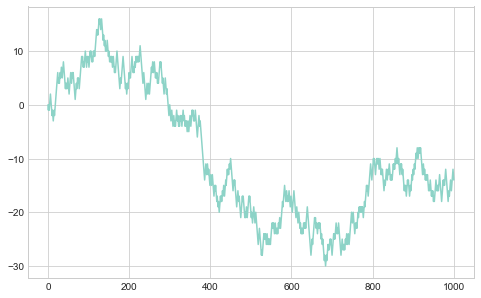

In [109]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
plt.rc('figure', figsize=(8, 5), facecolor='white')

plt.plot(walk)

We can simulate a random walk with NumPy by taking the steps as an array of coin flips and taking the cumulative sum.

In [110]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

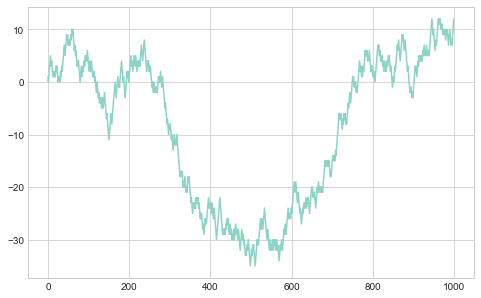

In [111]:
plt.plot(walk)

With NumPy, it become trivial to scale this to many thousands of random walks.

In [112]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps))
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
walks

array([[ -1,  -2,  -3, ...,  18,  19,  18],
       [  1,   0,   1, ...,  24,  25,  24],
       [  1,   0,   1, ...,  16,  15,  14],
       ...,
       [ -1,  -2,  -1, ..., -12, -13, -12],
       [  1,   0,   1, ..., -42, -41, -40],
       [ -1,   0,   1, ...,  10,   9,  10]])

In [113]:
# Maximum and minimum displacement
walks.max()

135

In [114]:
walks.min()

-120

Now we can find the minimum crossing time to 30 or -30.
We have to index the walks because not all will have made it to 30 or -30.

In [115]:
hit30 = (np.abs(walks) >= 30).any(1)
hit30.sum()

3409

In [116]:
crossing_times = (np.abs(walks[hit30]) >= 30).argmax(1)
crossing_times

array([323, 737, 595, ..., 621, 559, 403])

In [117]:
crossing_times.mean()

508.0577882076855

(array([  8.,  17.,  39.,  52.,  59.,  70.,  74.,  74.,  85., 105.,  92.,
        100.,  97.,  84.,  72.,  67., 114.,  81.,  88., 111.,  86.,  88.,
        102.,  77.,  74.,  98.,  69.,  74.,  64.,  60.,  88.,  55.,  59.,
         58.,  72.,  57.,  69.,  54.,  62.,  64.,  48.,  60.,  50.,  52.,
         50.,  47.,  40.,  60.,  33.,  50.]),
 array([ 63.  ,  81.72, 100.44, 119.16, 137.88, 156.6 , 175.32, 194.04,
        212.76, 231.48, 250.2 , 268.92, 287.64, 306.36, 325.08, 343.8 ,
        362.52, 381.24, 399.96, 418.68, 437.4 , 456.12, 474.84, 493.56,
        512.28, 531.  , 549.72, 568.44, 587.16, 605.88, 624.6 , 643.32,
        662.04, 680.76, 699.48, 718.2 , 736.92, 755.64, 774.36, 793.08,
        811.8 , 830.52, 849.24, 867.96, 886.68, 905.4 , 924.12, 942.84,
        961.56, 980.28, 999.  ]),
 <a list of 50 Patch objects>)

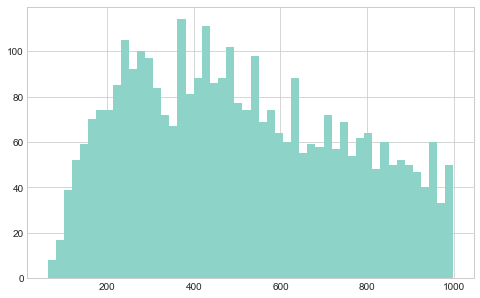

In [118]:
plt.hist(crossing_times, bins=50)

In [119]:
def PlotRandomWalks(num_to_plot, avg_over_n_walks=1):
    for i in range(num_to_plot):
        plt.plot(walks[np.random.randint(0, nwalks, size=avg_over_n_walks), :].mean(0))

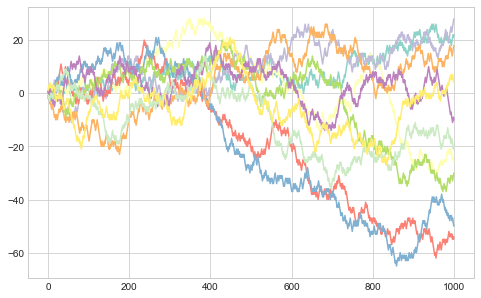

In [120]:
PlotRandomWalks(10, 1)

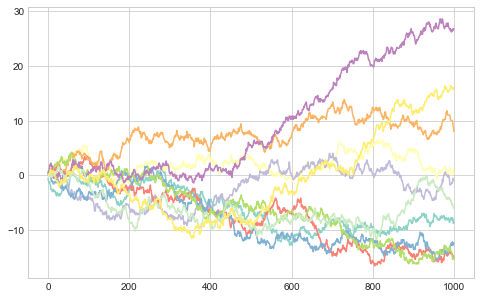

In [121]:
PlotRandomWalks(10, 10)

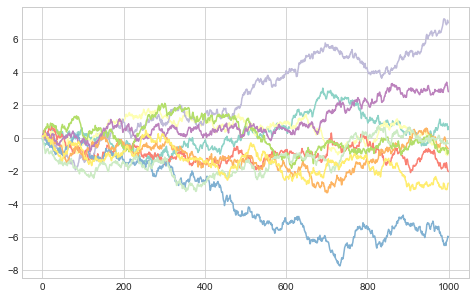

In [122]:
PlotRandomWalks(10, 100)

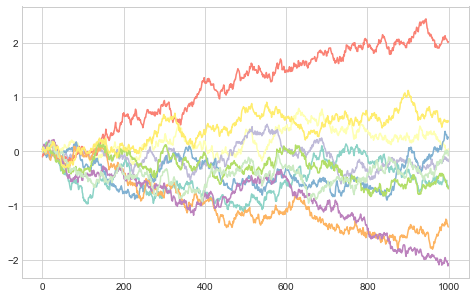

In [123]:
PlotRandomWalks(10, 1000)

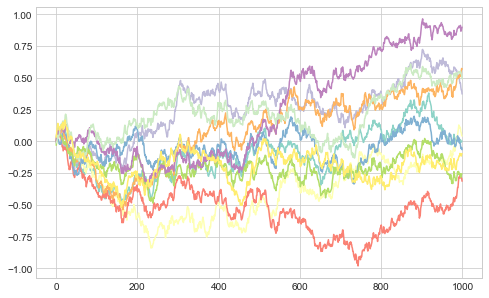

In [124]:
PlotRandomWalks(10, 5000)